In [23]:
import pandas as pd
import ast
from geopy.distance import geodesic
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split
import ml_help
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plot_label="Speed (km/h)"
YONGE_LOCS_MIDDLE_POINT = (43.693963, -79.395695)

In [24]:
inci_df = pd.read_csv("../analysis/050_incidents/050_incidents.csv.zip")
inci_df["collectedAt"] = pd.to_datetime(inci_df["collectedAt"], utc=True)
inci_df["collectedAt"] = inci_df["collectedAt"].dt.floor(freq="s")
inci_df.head()

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


In [25]:
inci_df["events"] = inci_df["events"].apply(lambda x: ast.literal_eval(x))
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
31614,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
31615,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
31616,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
31617,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"[{'code': 101, 'description': 'Stopped traffic...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Break events in one new row per event

In [26]:
inci_df = inci_df.explode("events").reset_index()
inci_df.drop("index", axis=1, inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- I don't need "from" and "to" because I have already flagged each incident as being close to either Yonge and/or Gardiner

In [27]:
inci_df.drop(columns=["from","to"],inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Getting event description from "events"

In [28]:
inci_df["event_description"] = inci_df["events"].apply(lambda x: x['description'])
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,event_description
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Dropping "iconCategory" and "events" in favour of more detailed "event_description"

In [29]:
inci_df.drop(["iconCategory", "events"], axis=1, inplace=True)
inci_df

,magnitudeOfDelay,length,delay,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,event_description
0,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,0.0,273.828235,0.0,2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,0.0,254.244867,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...
40632,1.0,442.750186,165.0,2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,1.0,2461.341117,127.0,2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,1.0,472.289662,158.0,2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Load speed and Yonge count data sets

In [30]:
flow_df = pd.read_csv("./data/yonge_flow.csv.zip")
loop_df = pd.read_csv("../../csv/v2/030_yonge_count_processed.csv.zip")

In [31]:
flow_df.drop(["month", "day", "day_of_week", "hour", "minute"], inplace=True, axis=1)
flow_df

,collectedAt,currentSpeed
0,2022-07-14 12:45:00+00:00,10
1,2022-07-14 12:51:44+00:00,13
2,2022-07-14 12:55:27+00:00,18
3,2022-07-14 13:00:00+00:00,13
4,2022-07-14 13:05:00+00:00,14
...,...,...
73530,2023-03-26 21:35:00+00:00,10
73531,2023-03-26 21:40:00+00:00,13
73532,2023-03-26 21:45:00+00:00,18
73533,2023-03-26 21:50:00+00:00,13


In [32]:
loop_df

,_id,location,lng,lat,time_end,total_count,distance_from_point,end_hour,end_minute,end_day_of_week
0,1,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 07:45:00,207,3.710382,7,45,2
1,2,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:00:00,187,3.710382,8,0,2
2,3,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:15:00,218,3.710382,8,15,2
3,4,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:30:00,260,3.710382,8,30,2
4,5,BROADVIEW AVE AT ERINDALE AVE,-79.358652,43.677521,2020-01-08 08:45:00,232,3.710382,8,45,2
...,...,...,...,...,...,...,...,...,...,...
123070,123071,DONLANDS AVE AT OCONNOR DR (PX 443),-79.343116,43.694722,2022-05-25 17:00:00,733,5.974853,17,0,2
123071,123072,DONLANDS AVE AT OCONNOR DR (PX 443),-79.343116,43.694722,2022-05-25 17:15:00,724,5.974853,17,15,2
123072,123073,DONLANDS AVE AT OCONNOR DR (PX 443),-79.343116,43.694722,2022-05-25 17:30:00,743,5.974853,17,30,2
123073,123074,DONLANDS AVE AT OCONNOR DR (PX 443),-79.343116,43.694722,2022-05-25 17:45:00,705,5.974853,17,45,2


- Merge incidents and data set with location and distance

In [33]:
inci_with_dist_df = pd.merge(inci_df, loop_df[["location","distance_from_point"]], left_on="close_to_yonge_detector", right_on="location", how="left")
inci_with_dist_df

,magnitudeOfDelay,length,delay,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,event_description,location,distance_from_point
0,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,FRONT ST AT YONGE ST (PX 29),0.001789
1,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,FRONT ST AT YONGE ST (PX 29),0.001789
2,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,FRONT ST AT YONGE ST (PX 29),0.001789
3,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,FRONT ST AT YONGE ST (PX 29),0.001789
4,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,FRONT ST AT YONGE ST (PX 29),0.001789
...,...,...,...,...,...,...,...,...,...
2897030,1.0,735.008314,148.0,2023-03-26 21:50:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Slow traffic,FRONT ST AT YONGE ST (PX 29),0.001789
2897031,1.0,735.008314,148.0,2023-03-26 21:50:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Slow traffic,FRONT ST AT YONGE ST (PX 29),0.001789
2897032,1.0,735.008314,148.0,2023-03-26 21:50:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Slow traffic,FRONT ST AT YONGE ST (PX 29),0.001789
2897033,1.0,735.008314,148.0,2023-03-26 21:50:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Slow traffic,FRONT ST AT YONGE ST (PX 29),0.001789


In [34]:
inci_with_dist_df.drop_duplicates(inplace=True)
inci_with_dist_df.drop("location",inplace=True,axis=1)
inci_with_dist_df["distance_from_point"] = inci_with_dist_df["distance_from_point"].fillna(-1)
inci_with_dist_df = inci_with_dist_df.reset_index()
inci_with_dist_df = inci_with_dist_df.drop("index",axis=1)
inci_with_dist_df

,magnitudeOfDelay,length,delay,collectedAt,close_to_yonge_detector,close_to_gardiner_detector,event_description,distance_from_point
0,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,0.001789
1,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,0.112289
2,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,0.112289
3,0.0,273.828235,0.0,2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,0.127365
4,0.0,254.244867,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,0.112289
...,...,...,...,...,...,...,...,...
40577,1.0,442.750186,165.0,2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic,0.112289
40578,1.0,2461.341117,127.0,2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic,0.127365
40579,1.0,472.289662,158.0,2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic,0.112289
40580,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,0.112289


- Load weather data set

In [35]:
weather_df = pd.read_csv("./data/weather_data.csv.zip")
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute'], axis=1, inplace=True)
weather_df

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00+00:00,18.69,18.68,79,2.57,340,0,0.0,0.0,0,1,0,0,0
1,10.0,2022-07-14 12:51:44+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
2,10.0,2022-07-14 12:55:27+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
3,10.0,2022-07-14 13:00:00+00:00,19.38,19.36,76,2.57,340,0,0.0,0.0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00+00:00,19.42,19.40,76,2.57,340,0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73530,10.0,2023-03-26 21:35:00+00:00,9.77,6.07,41,9.26,290,0,0.0,0.0,0,1,0,0,0
73531,10.0,2023-03-26 21:40:00+00:00,9.77,6.07,41,9.26,290,0,0.0,0.0,0,1,0,0,0
73532,10.0,2023-03-26 21:45:00+00:00,9.64,5.90,40,9.26,290,0,0.0,0.0,0,1,0,0,0
73533,10.0,2023-03-26 21:50:00+00:00,9.61,5.86,40,9.26,290,0,0.0,0.0,0,1,0,0,0


- Convert collectedAt to datetime

In [36]:
flow_df["collectedAt"] = pd.to_datetime(flow_df["collectedAt"],utc=True)
inci_with_dist_df["collectedAt"] = pd.to_datetime(inci_df["collectedAt"],utc=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)
weather_df["collectedAt"] = weather_df["collectedAt"].dt.floor(freq="t")

- Merge speed data set and incidents data set

In [37]:
df = flow_df.merge(inci_with_dist_df,on="collectedAt",how="left")
df

,collectedAt,currentSpeed,magnitudeOfDelay,length,delay,close_to_yonge_detector,close_to_gardiner_detector,event_description,distance_from_point
0,2022-07-14 12:45:00+00:00,10,2.0,372.918000,199.0,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,0.001789
1,2022-07-14 12:45:00+00:00,10,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,0.112289
2,2022-07-14 12:45:00+00:00,10,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,0.112289
3,2022-07-14 12:45:00+00:00,10,0.0,273.828235,0.0,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,0.127365
4,2022-07-14 12:45:00+00:00,10,0.0,254.244867,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,0.112289
...,...,...,...,...,...,...,...,...,...
94051,2023-03-26 21:35:00+00:00,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94052,2023-03-26 21:40:00+00:00,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94053,2023-03-26 21:45:00+00:00,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94054,2023-03-26 21:50:00+00:00,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Merge flow and incident with weather

In [38]:
df = df.merge(weather_df,on="collectedAt",how="left")
df

,collectedAt,currentSpeed,magnitudeOfDelay,length,delay,close_to_yonge_detector,close_to_gardiner_detector,event_description,distance_from_point,visibility,...,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-07-14 12:45:00+00:00,10,2.0,372.918000,199.0,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,0.001789,10.0,...,2.57,340.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2022-07-14 12:45:00+00:00,10,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,0.112289,10.0,...,2.57,340.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2022-07-14 12:45:00+00:00,10,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,0.112289,10.0,...,2.57,340.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2022-07-14 12:45:00+00:00,10,0.0,273.828235,0.0,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,0.127365,10.0,...,2.57,340.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2022-07-14 12:45:00+00:00,10,0.0,254.244867,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,0.112289,10.0,...,2.57,340.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94051,2023-03-26 21:35:00+00:00,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,9.26,290.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94052,2023-03-26 21:40:00+00:00,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,9.26,290.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94053,2023-03-26 21:45:00+00:00,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,9.26,290.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94054,2023-03-26 21:50:00+00:00,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,9.26,290.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


- Fill NaNs with appropriate values

In [39]:
df["magnitudeOfDelay"] = df["magnitudeOfDelay"].fillna(0)
df["length"] = df["length"].fillna(0)
df["delay"] = df["delay"].fillna(0)
df["close_to_yonge_detector"] = df["close_to_yonge_detector"].fillna("NO_INC")
df["close_to_gardiner_detector"] = df["close_to_gardiner_detector"].fillna("FAR")
df["event_description"] = df["event_description"].fillna("No incidents")
df["distance_from_point"] = df["distance_from_point"].fillna(-1)
df

,collectedAt,currentSpeed,magnitudeOfDelay,length,delay,close_to_yonge_detector,close_to_gardiner_detector,event_description,distance_from_point,visibility,...,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-07-14 12:45:00+00:00,10,2.0,372.918000,199.0,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,0.001789,10.0,...,2.57,340.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2022-07-14 12:45:00+00:00,10,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,0.112289,10.0,...,2.57,340.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2022-07-14 12:45:00+00:00,10,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,0.112289,10.0,...,2.57,340.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2022-07-14 12:45:00+00:00,10,0.0,273.828235,0.0,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,0.127365,10.0,...,2.57,340.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2022-07-14 12:45:00+00:00,10,0.0,254.244867,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,0.112289,10.0,...,2.57,340.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94051,2023-03-26 21:35:00+00:00,10,0.0,0.000000,0.0,NO_INC,FAR,No incidents,-1.000000,10.0,...,9.26,290.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94052,2023-03-26 21:40:00+00:00,13,0.0,0.000000,0.0,NO_INC,FAR,No incidents,-1.000000,10.0,...,9.26,290.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94053,2023-03-26 21:45:00+00:00,18,0.0,0.000000,0.0,NO_INC,FAR,No incidents,-1.000000,10.0,...,9.26,290.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94054,2023-03-26 21:50:00+00:00,13,0.0,0.000000,0.0,NO_INC,FAR,No incidents,-1.000000,10.0,...,9.26,290.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
df.dropna(inplace=True)

# Plot correlations
- Between speed, day of week, hour, magnitude of delay, length, delay

# Expand date and time
- Also remove collectedAt

In [41]:
df["month"] = df.collectedAt.dt.month_name()
df["day_of_week"] = df.collectedAt.dt.dayofweek
df["day"] = df.collectedAt.dt.day
df["hour"] = df.collectedAt.dt.hour
df["minute"] = df.collectedAt.dt.minute
df.drop("collectedAt",inplace=True,axis=1)
df

,currentSpeed,magnitudeOfDelay,length,delay,close_to_yonge_detector,close_to_gardiner_detector,event_description,distance_from_point,visibility,temperature,...,cloudy,clear,atmosphere,snowy,rainy,month,day_of_week,day,hour,minute
0,10,2.0,372.918000,199.0,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,0.001789,10.0,18.69,...,0.0,1.0,0.0,0.0,0.0,July,3,14,12,45
1,10,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,0.112289,10.0,18.69,...,0.0,1.0,0.0,0.0,0.0,July,3,14,12,45
2,10,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,0.112289,10.0,18.69,...,0.0,1.0,0.0,0.0,0.0,July,3,14,12,45
3,10,0.0,273.828235,0.0,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,0.127365,10.0,18.69,...,0.0,1.0,0.0,0.0,0.0,July,3,14,12,45
4,10,0.0,254.244867,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,0.112289,10.0,18.69,...,0.0,1.0,0.0,0.0,0.0,July,3,14,12,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94051,10,0.0,0.000000,0.0,NO_INC,FAR,No incidents,-1.000000,10.0,9.77,...,0.0,1.0,0.0,0.0,0.0,March,6,26,21,35
94052,13,0.0,0.000000,0.0,NO_INC,FAR,No incidents,-1.000000,10.0,9.77,...,0.0,1.0,0.0,0.0,0.0,March,6,26,21,40
94053,18,0.0,0.000000,0.0,NO_INC,FAR,No incidents,-1.000000,10.0,9.64,...,0.0,1.0,0.0,0.0,0.0,March,6,26,21,45
94054,13,0.0,0.000000,0.0,NO_INC,FAR,No incidents,-1.000000,10.0,9.61,...,0.0,1.0,0.0,0.0,0.0,March,6,26,21,50


In [42]:
data_to_correlate = df[["currentSpeed","day_of_week","hour","magnitudeOfDelay","length","delay","visibility","temperature","humidity","windSpeed","cloudsAll","rain1h","snow1h"]]
corr_mat = data_to_correlate.corr()

In [43]:
corr_mat

,currentSpeed,day_of_week,hour,magnitudeOfDelay,length,delay,visibility,temperature,humidity,windSpeed,cloudsAll,rain1h,snow1h
currentSpeed,1.000000,0.016756,-0.366212,-0.354905,-0.184642,-0.286777,-0.019429,-0.067364,0.191398,-0.058999,0.037874,0.005385,-0.011055
day_of_week,0.016756,1.000000,-0.072437,-0.062795,-0.012497,-0.042771,-0.019551,-0.015949,-0.027956,0.005254,-0.014129,-0.003885,0.018506
hour,-0.366212,-0.072437,1.000000,0.337885,0.183140,0.278460,0.019626,0.137612,-0.296249,0.080884,0.003684,0.006587,0.001714
magnitudeOfDelay,-0.354905,-0.062795,0.337885,1.000000,0.341239,0.656837,0.040170,0.180606,-0.233777,-0.004685,-0.067115,0.003764,-0.013500
length,-0.184642,-0.012497,0.183140,0.341239,1.000000,0.533699,-0.018753,0.054883,-0.093566,0.028213,-0.008043,0.022368,0.020331
delay,-0.286777,-0.042771,0.278460,0.656837,0.533699,1.000000,0.040107,0.155311,-0.200808,-0.000555,-0.065263,0.004955,-0.008227
visibility,-0.019429,-0.019551,0.019626,0.040170,-0.018753,0.040107,1.000000,0.133874,-0.342836,-0.076625,-0.200488,-0.166368,-0.312930
temperature,-0.067364,-0.015949,0.137612,0.180606,0.054883,0.155311,0.133874,1.000000,-0.307003,-0.341343,-0.251912,-0.004678,-0.120105
humidity,0.191398,-0.027956,-0.296249,-0.233777,-0.093566,-0.200808,-0.342836,-0.307003,1.000000,0.006347,0.405375,0.168388,0.132432
windSpeed,-0.058999,0.005254,0.080884,-0.004685,0.028213,-0.000555,-0.076625,-0.341343,0.006347,1.000000,0.154312,0.056927,0.173694


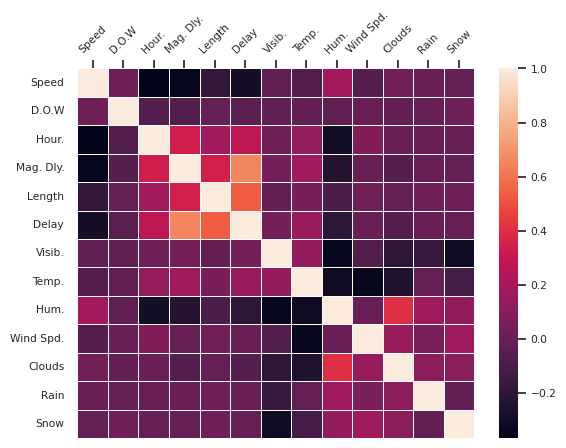

In [44]:
labels=["Speed", "D.O.W", "Hour.", "Mag. Dly.", "Length", "Delay", "Visib.", "Temp.", "Hum.", "Wind Spd.", "Clouds", "Rain", "Snow"]

sns.set(font_scale=0.7)
ax = sns.heatmap(corr_mat,linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/140_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/140_correlations.png", bbox_inches="tight")
plt.savefig("./plots/140_correlations.pdf", bbox_inches="tight")

# Drop unused cols

In [46]:
df.drop(columns=["close_to_yonge_detector", "close_to_gardiner_detector"],inplace=True)
df

,currentSpeed,magnitudeOfDelay,length,delay,event_description,distance_from_point,visibility,temperature,FeelsLike,humidity,...,cloudy,clear,atmosphere,snowy,rainy,month,day_of_week,day,hour,minute
0,10,2.0,372.918000,199.0,Backed up traffic,0.001789,10.0,18.69,18.68,79.0,...,0.0,1.0,0.0,0.0,0.0,July,Thursday,14,12,45
1,10,0.0,302.765346,0.0,Lane closed,0.112289,10.0,18.69,18.68,79.0,...,0.0,1.0,0.0,0.0,0.0,July,Thursday,14,12,45
2,10,0.0,302.765346,0.0,Roadworks,0.112289,10.0,18.69,18.68,79.0,...,0.0,1.0,0.0,0.0,0.0,July,Thursday,14,12,45
3,10,0.0,273.828235,0.0,Roadworks,0.127365,10.0,18.69,18.68,79.0,...,0.0,1.0,0.0,0.0,0.0,July,Thursday,14,12,45
4,10,0.0,254.244867,0.0,Lane closed,0.112289,10.0,18.69,18.68,79.0,...,0.0,1.0,0.0,0.0,0.0,July,Thursday,14,12,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94051,10,0.0,0.000000,0.0,No incidents,-1.000000,10.0,9.77,6.07,41.0,...,0.0,1.0,0.0,0.0,0.0,March,Sunday,26,21,35
94052,13,0.0,0.000000,0.0,No incidents,-1.000000,10.0,9.77,6.07,41.0,...,0.0,1.0,0.0,0.0,0.0,March,Sunday,26,21,40
94053,18,0.0,0.000000,0.0,No incidents,-1.000000,10.0,9.64,5.90,40.0,...,0.0,1.0,0.0,0.0,0.0,March,Sunday,26,21,45
94054,13,0.0,0.000000,0.0,No incidents,-1.000000,10.0,9.61,5.86,40.0,...,0.0,1.0,0.0,0.0,0.0,March,Sunday,26,21,50


# Onehot encode categorical attributes
- Also cast all fields to float32

In [47]:
categorical_attrs = ["event_description","month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs, prefix="", prefix_sep="")
transformed_df = transformed_df.astype("float32")
transformed_df

,currentSpeed,magnitudeOfDelay,length,delay,distance_from_point,visibility,temperature,FeelsLike,humidity,windSpeed,...,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,10.0,2.0,372.917999,199.0,0.001789,10.0,18.690001,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10.0,0.0,302.765350,0.0,0.112289,10.0,18.690001,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,10.0,0.0,302.765350,0.0,0.112289,10.0,18.690001,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10.0,0.0,273.828247,0.0,0.127365,10.0,18.690001,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10.0,0.0,254.244873,0.0,0.112289,10.0,18.690001,18.68,79.0,2.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94051,10.0,0.0,0.000000,0.0,-1.000000,10.0,9.770000,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94052,13.0,0.0,0.000000,0.0,-1.000000,10.0,9.770000,6.07,41.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94053,18.0,0.0,0.000000,0.0,-1.000000,10.0,9.640000,5.90,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94054,13.0,0.0,0.000000,0.0,-1.000000,10.0,9.610000,5.86,40.0,9.26,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
transformed_df.rename({
    'magnitudeOfDelay':"Mag. of Delay",
    'length': "Length",
    'delay': "Delay",
    'distance_from_point': "Dist. from Point",
    'visibility':"Visibility",
    'temperature':"Temperature",
    'FeelsLike':"Feels Like",
    'humidity':"Humidity",
    'windSpeed':"Wind Speed",
    'windDegree':"Wind Degree",
    'cloudsAll':"Clouds All",
    'rain1h':"Rain (1h)",
    'snow1h':"Snow (1h)",
    'cloudy': "Cloudy",
    'clear': "Clear",
    'atmosphere': "Atmosphere",
    'snowy': "Snowy",
    'rainy':"Rainy",
    'day': "Day",
    'hour': "Hour",
    'minute': "Minute",
    'Bridge demolition work':'Bridge demo. work',
    'Highway reduced to one lane':"Hwy. reduced to one lane",
    'Obstruction on the road':"Obst. on the road"
}, axis=1, inplace=True)

In [49]:
transformed_df.to_csv("./data/yonge_flow_weather_incidents.csv.zip", index=False, compression="zip")